# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read Data

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Seperate Numerical and Categorical Data

In [4]:
train_data_types = dict(train_data.dtypes)
train_data_num = pd.DataFrame()
train_data_cat = pd.DataFrame()
for key,value in train_data_types.items():
    if (value=="object"):
        train_data_cat.insert(0,key,train_data[key])
    else:
        train_data_num.insert(0,key,train_data[key])
train_data_num.pop('Id')

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

# Data Exploration

In [5]:
for column in train_data_num.columns:
    print(column)
    print(train_data_num[column].describe())
    print("\n")

SalePrice
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


YrSold
count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64


MoSold
count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64


MiscVal
count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64


PoolArea
count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%      

In [6]:
for column in train_data_cat.columns:
    print(column)
    print(train_data_cat[column].value_counts())
    print("\n")

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64


Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


PoolQC
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64


PavedDrive
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


GarageFinish
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       

SalePrice


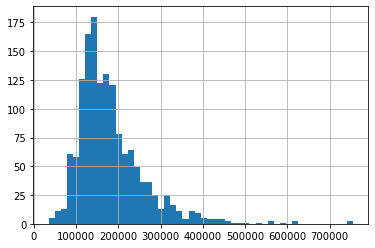

YrSold


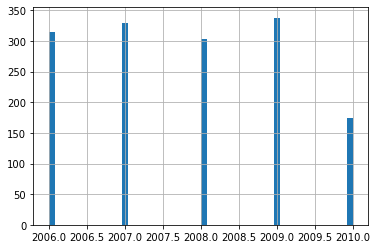

MoSold


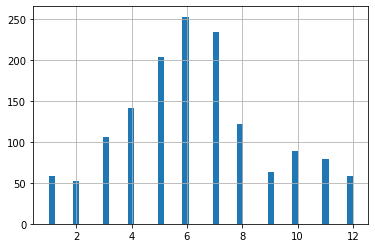

MiscVal


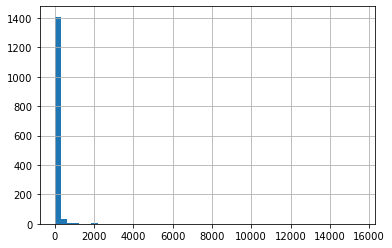

PoolArea


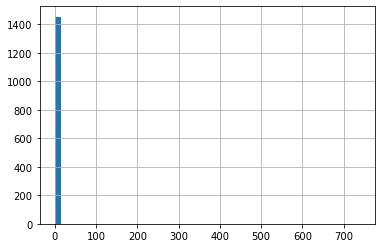

ScreenPorch


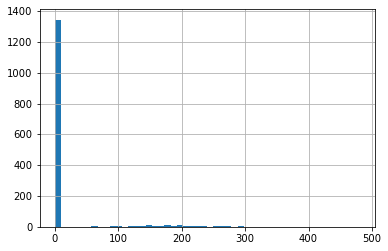

3SsnPorch


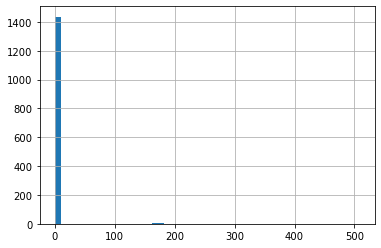

EnclosedPorch


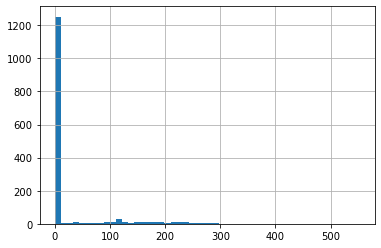

OpenPorchSF


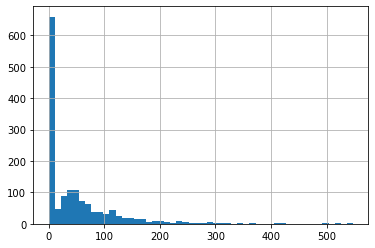

WoodDeckSF


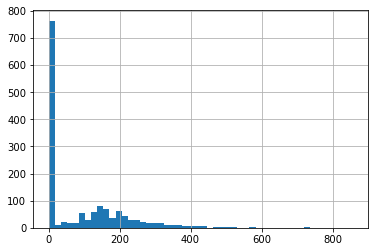

GarageArea


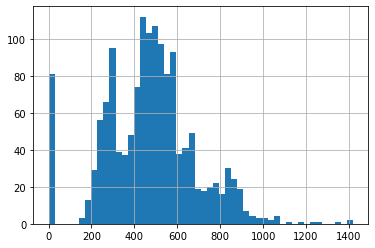

GarageCars


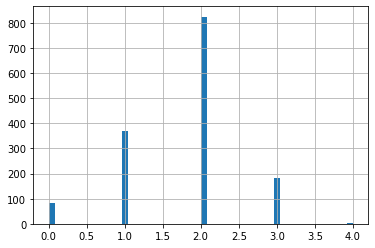

GarageYrBlt


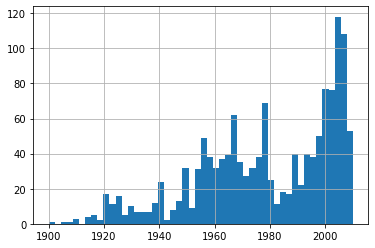

Fireplaces


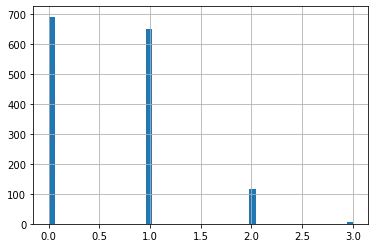

TotRmsAbvGrd


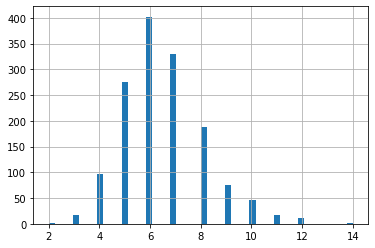

KitchenAbvGr


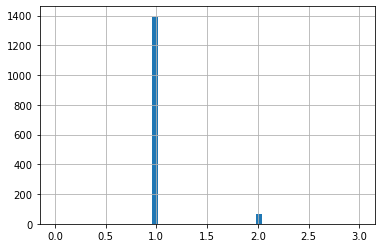

BedroomAbvGr


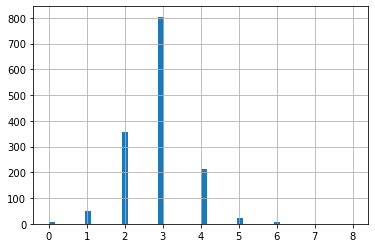

HalfBath


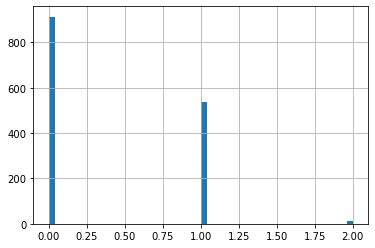

FullBath


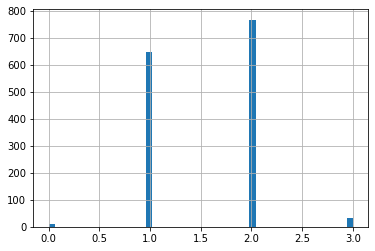

BsmtHalfBath


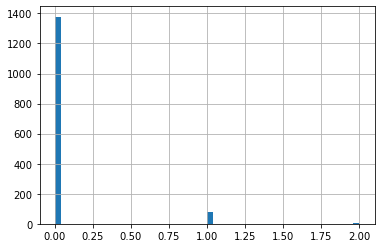

BsmtFullBath


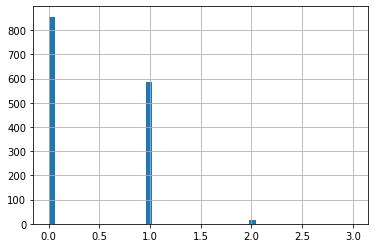

GrLivArea


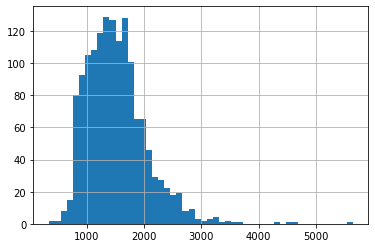

LowQualFinSF


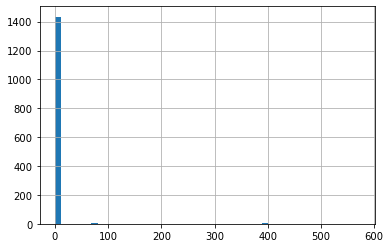

2ndFlrSF


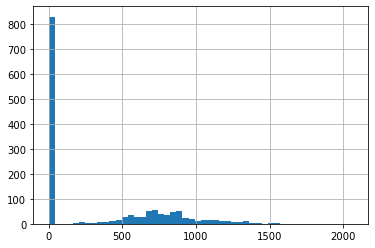

1stFlrSF


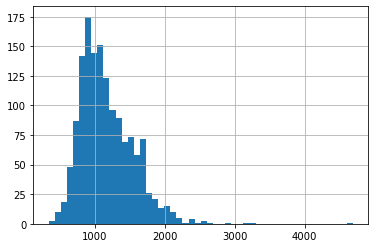

TotalBsmtSF


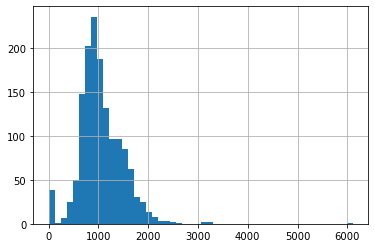

BsmtUnfSF


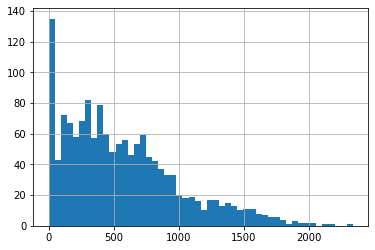

BsmtFinSF2


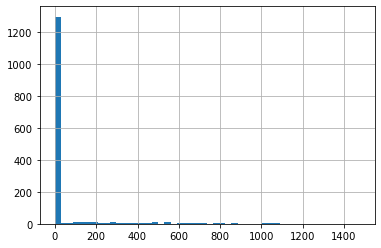

BsmtFinSF1


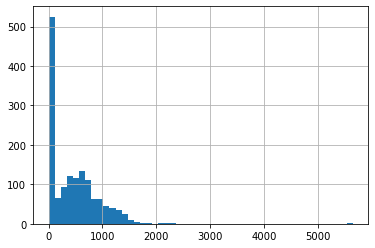

MasVnrArea


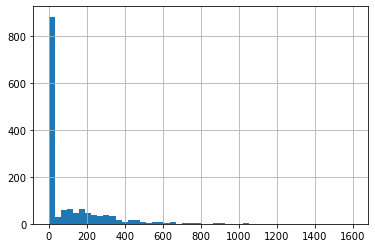

YearRemodAdd


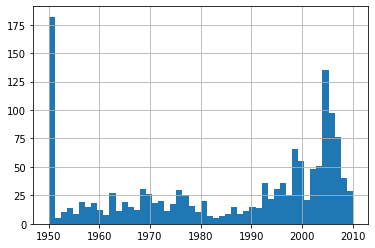

YearBuilt


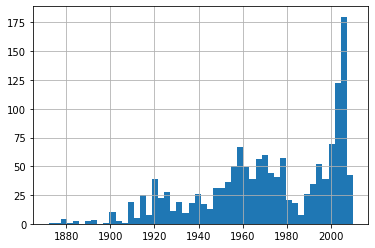

OverallCond


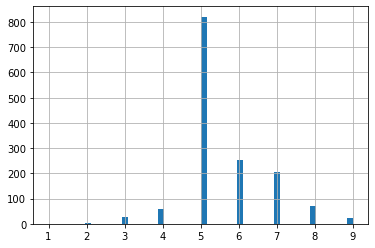

OverallQual


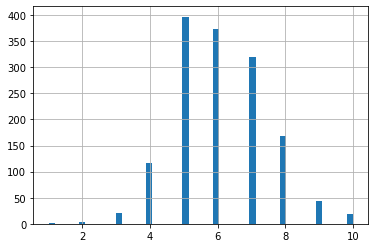

LotArea


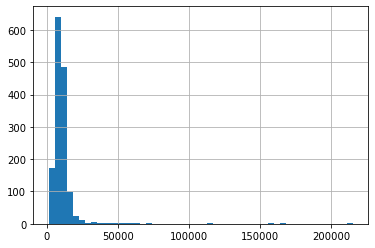

LotFrontage


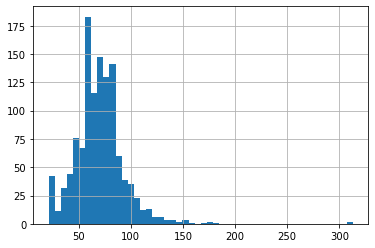

MSSubClass


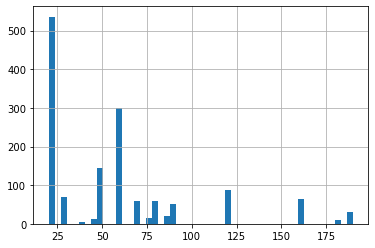

In [7]:
for column in train_data_num.columns:
    print(column)
    train_data_num[column].hist(bins=50)
    plt.show()

## Correlation

In [8]:
corr_matrix = train_data_num.corr()

In [9]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

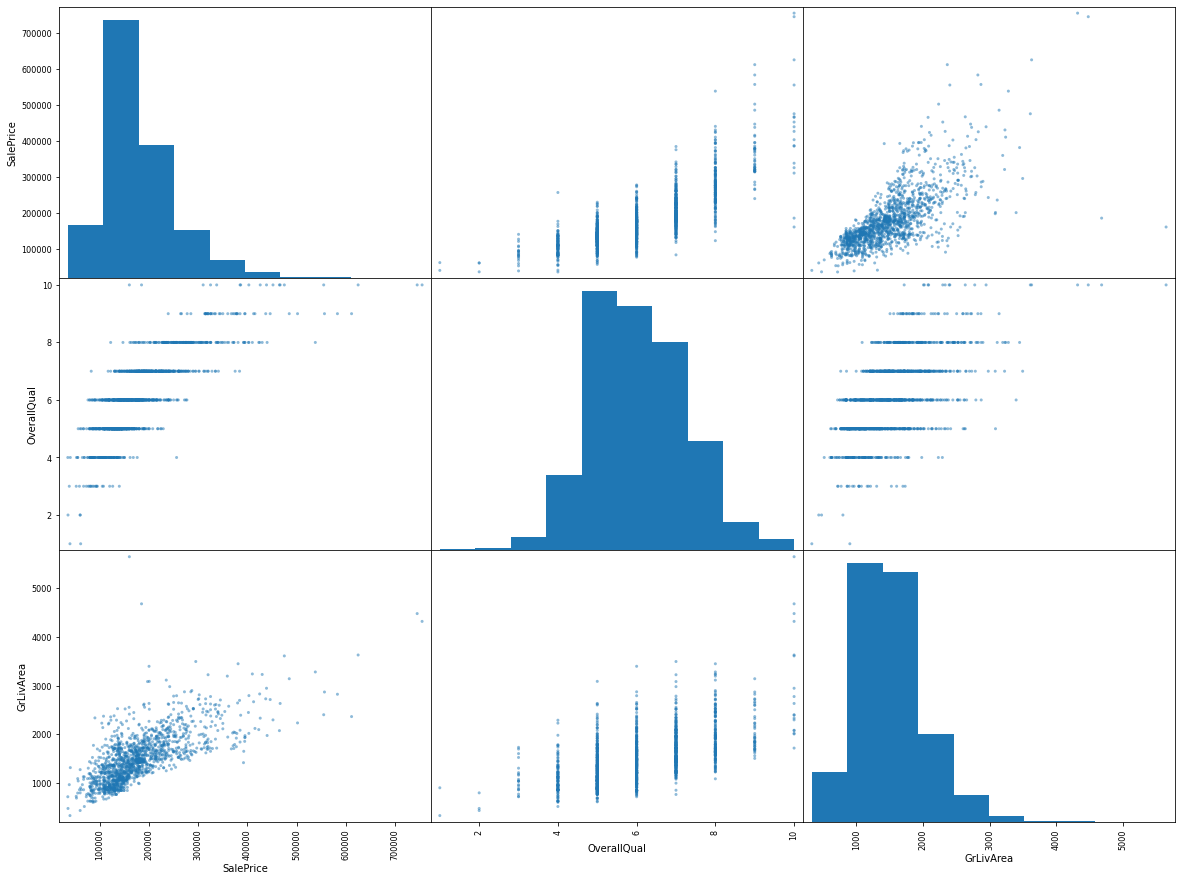

In [10]:
from pandas.plotting import scatter_matrix
attributes = ["SalePrice", "OverallQual", "GrLivArea"]
scatter_matrix(train_data_num[attributes], figsize=(20, 15))
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>

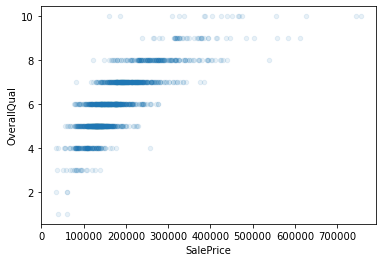

In [11]:
train_data_num.plot(kind="scatter", x="SalePrice", y="OverallQual",alpha=0.1)

# Feature Selection

## 1. Numerical Columns

### 1a. Variance Threshold

In [12]:
housing_num = train_data_num.copy()
housing_num_y =  housing_num["SalePrice"]
housing_num_x = housing_num.drop(labels=["SalePrice"], axis=1)

In [13]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0.3)
var_thres.fit(housing_num_x)

C:\Users\SAMARTH\anaconda3\envs\handsonmlch2\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


VarianceThreshold(threshold=0.3)

In [14]:
housing_num_x.columns[~var_thres.get_support()]

Index(['KitchenAbvGr', 'HalfBath', 'BsmtHalfBath', 'BsmtFullBath'], dtype='object')

In [15]:
for index, column in enumerate(housing_num_x.columns):
    if var_thres.get_support()[index]==False:
        print(column)
        housing_num_x=housing_num_x.drop(column,axis=1)

KitchenAbvGr
HalfBath
BsmtHalfBath
BsmtFullBath


In [16]:
housing_num_x

,YrSold,MoSold,MiscVal,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,GarageArea,...,BsmtFinSF2,BsmtFinSF1,MasVnrArea,YearRemodAdd,YearBuilt,OverallCond,OverallQual,LotArea,LotFrontage,MSSubClass
0,2008,2,0,0,0,0,0,61,0,548,...,0,706,196.0,2003,2003,5,7,8450,65.0,60
1,2007,5,0,0,0,0,0,0,298,460,...,0,978,0.0,1976,1976,8,6,9600,80.0,20
2,2008,9,0,0,0,0,0,42,0,608,...,0,486,162.0,2002,2001,5,7,11250,68.0,60
3,2006,2,0,0,0,0,272,35,0,642,...,0,216,0.0,1970,1915,5,7,9550,60.0,70
4,2008,12,0,0,0,0,0,84,192,836,...,0,655,350.0,2000,2000,5,8,14260,84.0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2007,8,0,0,0,0,0,40,0,460,...,0,0,0.0,2000,1999,5,6,7917,62.0,60
1456,2010,2,0,0,0,0,0,0,349,500,...,163,790,119.0,1988,1978,6,6,13175,85.0,20
1457,2010,5,2500,0,0,0,0,60,0,252,...,0,275,0.0,2006,1941,9,7,9042,66.0,70
1458,2010,4,0,0,0,0,112,0,366,240,...,1029,49,0.0,1996,1950,6,5,9717,68.0,20


### 1b. Correlation

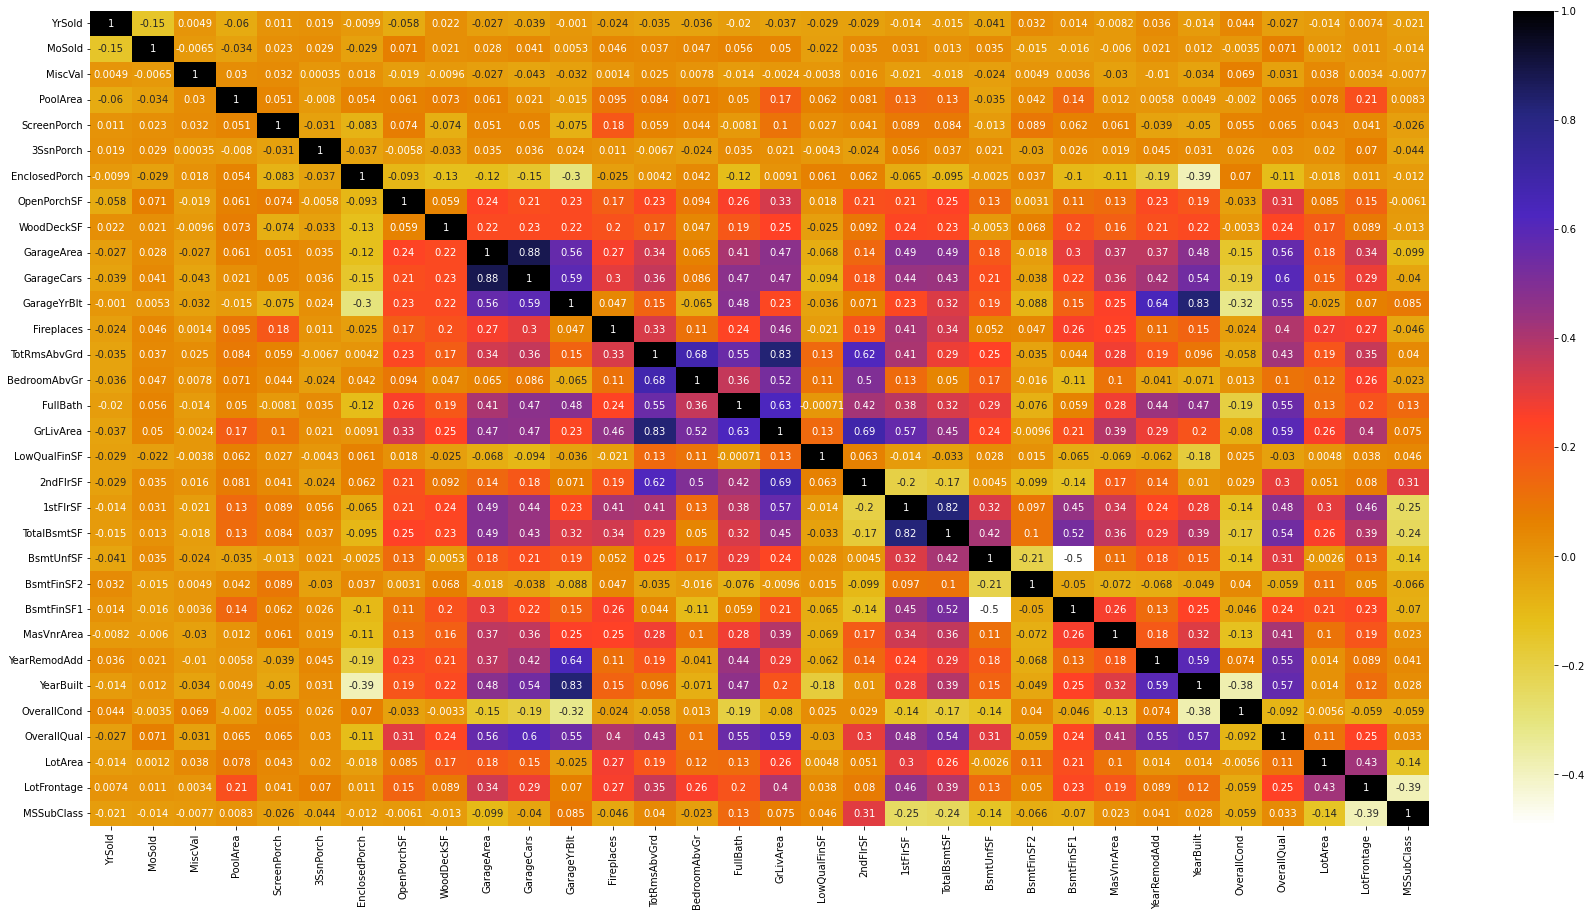

In [17]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(30,15))
cor = housing_num_x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [18]:
# Select highly correlated features
# Will remove the first feature that is correlated with any other feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the correlated column names
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold: # Only checking for positive correlation (use abs function to check for negative as well)
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [19]:
corr_features = correlation(housing_num_x, 0.8)
corr_features

{'GarageCars', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt'}

In [20]:
housing_num_x=housing_num_x.drop(corr_features, axis=1)
housing_num_x

,YrSold,MoSold,MiscVal,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,GarageArea,...,BsmtUnfSF,BsmtFinSF2,BsmtFinSF1,MasVnrArea,YearRemodAdd,OverallCond,OverallQual,LotArea,LotFrontage,MSSubClass
0,2008,2,0,0,0,0,0,61,0,548,...,150,0,706,196.0,2003,5,7,8450,65.0,60
1,2007,5,0,0,0,0,0,0,298,460,...,284,0,978,0.0,1976,8,6,9600,80.0,20
2,2008,9,0,0,0,0,0,42,0,608,...,434,0,486,162.0,2002,5,7,11250,68.0,60
3,2006,2,0,0,0,0,272,35,0,642,...,540,0,216,0.0,1970,5,7,9550,60.0,70
4,2008,12,0,0,0,0,0,84,192,836,...,490,0,655,350.0,2000,5,8,14260,84.0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2007,8,0,0,0,0,0,40,0,460,...,953,0,0,0.0,2000,5,6,7917,62.0,60
1456,2010,2,0,0,0,0,0,0,349,500,...,589,163,790,119.0,1988,6,6,13175,85.0,20
1457,2010,5,2500,0,0,0,0,60,0,252,...,877,0,275,0.0,2006,9,7,9042,66.0,70
1458,2010,4,0,0,0,0,112,0,366,240,...,0,1029,49,0.0,1996,6,5,9717,68.0,20


### 1c. Information Gain

In [21]:
housing_num_x.isnull().sum()

YrSold             0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
GarageArea         0
GarageYrBlt       81
Fireplaces         0
TotRmsAbvGrd       0
BedroomAbvGr       0
FullBath           0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
BsmtUnfSF          0
BsmtFinSF2         0
BsmtFinSF1         0
MasVnrArea         8
YearRemodAdd       0
OverallCond        0
OverallQual        0
LotArea            0
LotFrontage      259
MSSubClass         0
dtype: int64

In [22]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(housing_num_x.fillna(0), housing_num_y)
mutual_info=pd.Series(mutual_info)
mutual_info.index = housing_num_x.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.565457
GarageArea       0.365091
1stFlrSF         0.307911
MSSubClass       0.276695
FullBath         0.258401
GarageYrBlt      0.257154
YearRemodAdd     0.244002
TotRmsAbvGrd     0.213767
LotFrontage      0.208931
2ndFlrSF         0.196445
Fireplaces       0.165653
LotArea          0.160728
OpenPorchSF      0.150623
BsmtFinSF1       0.148400
BsmtUnfSF        0.117948
WoodDeckSF       0.114015
OverallCond      0.111239
MasVnrArea       0.094139
BedroomAbvGr     0.062950
EnclosedPorch    0.027527
MiscVal          0.013244
ScreenPorch      0.012663
BsmtFinSF2       0.004161
YrSold           0.000111
PoolArea         0.000000
LowQualFinSF     0.000000
MoSold           0.000000
3SsnPorch        0.000000
dtype: float64

<AxesSubplot:>

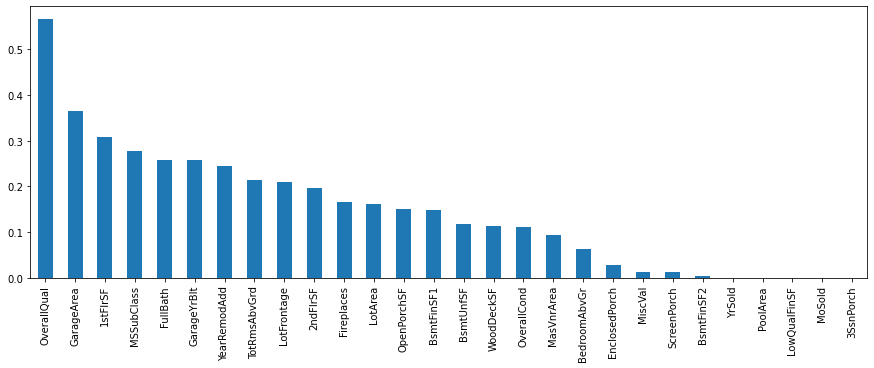

In [23]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [24]:
from sklearn.feature_selection import SelectPercentile
# Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=50)
selected_top_columns.fit(housing_num_x.fillna(0), housing_num_y)
housing_num_x = housing_num_x.drop(housing_num_x.columns[selected_top_columns.get_support()], axis=1)

In [25]:
housing_num_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YrSold         1460 non-null   int64  
 1   MoSold         1460 non-null   int64  
 2   MiscVal        1460 non-null   int64  
 3   PoolArea       1460 non-null   int64  
 4   ScreenPorch    1460 non-null   int64  
 5   3SsnPorch      1460 non-null   int64  
 6   EnclosedPorch  1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   BedroomAbvGr   1460 non-null   int64  
 9   LowQualFinSF   1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  BsmtFinSF2     1460 non-null   int64  
 12  MasVnrArea     1452 non-null   float64
 13  OverallCond    1460 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 159.8 KB


### Categorical Columns

In [26]:
housing_cat=train_data_cat.copy()
housing_cat.columns

Index(['SaleCondition', 'SaleType', 'MiscFeature', 'Fence', 'PoolQC',
       'PavedDrive', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
       'FireplaceQu', 'Functional', 'KitchenQual', 'Electrical', 'CentralAir',
       'HeatingQC', 'Heating', 'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure',
       'BsmtCond', 'BsmtQual', 'Foundation', 'ExterCond', 'ExterQual',
       'MasVnrType', 'Exterior2nd', 'Exterior1st', 'RoofMatl', 'RoofStyle',
       'HouseStyle', 'BldgType', 'Condition2', 'Condition1', 'Neighborhood',
       'LandSlope', 'LotConfig', 'Utilities', 'LandContour', 'LotShape',
       'Alley', 'Street', 'MSZoning'],
      dtype='object')

### 1a. Based on Null Values

In [27]:
housing_cat=train_data_cat.copy()
# Based on missing values
for column in housing_cat.columns:   
    if sum(housing_cat[column].isnull())>0.2*len(housing_cat):
        housing_cat.pop(column)
housing_cat

,SaleCondition,SaleType,PavedDrive,GarageCond,GarageQual,GarageFinish,GarageType,Functional,KitchenQual,Electrical,...,Condition2,Condition1,Neighborhood,LandSlope,LotConfig,Utilities,LandContour,LotShape,Street,MSZoning
0,Normal,WD,Y,TA,TA,RFn,Attchd,Typ,Gd,SBrkr,...,Norm,Norm,CollgCr,Gtl,Inside,AllPub,Lvl,Reg,Pave,RL
1,Normal,WD,Y,TA,TA,RFn,Attchd,Typ,TA,SBrkr,...,Norm,Feedr,Veenker,Gtl,FR2,AllPub,Lvl,Reg,Pave,RL
2,Normal,WD,Y,TA,TA,RFn,Attchd,Typ,Gd,SBrkr,...,Norm,Norm,CollgCr,Gtl,Inside,AllPub,Lvl,IR1,Pave,RL
3,Abnorml,WD,Y,TA,TA,Unf,Detchd,Typ,Gd,SBrkr,...,Norm,Norm,Crawfor,Gtl,Corner,AllPub,Lvl,IR1,Pave,RL
4,Normal,WD,Y,TA,TA,RFn,Attchd,Typ,Gd,SBrkr,...,Norm,Norm,NoRidge,Gtl,FR2,AllPub,Lvl,IR1,Pave,RL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Normal,WD,Y,TA,TA,RFn,Attchd,Typ,TA,SBrkr,...,Norm,Norm,Gilbert,Gtl,Inside,AllPub,Lvl,Reg,Pave,RL
1456,Normal,WD,Y,TA,TA,Unf,Attchd,Min1,TA,SBrkr,...,Norm,Norm,NWAmes,Gtl,Inside,AllPub,Lvl,Reg,Pave,RL
1457,Normal,WD,Y,TA,TA,RFn,Attchd,Typ,Gd,SBrkr,...,Norm,Norm,Crawfor,Gtl,Inside,AllPub,Lvl,Reg,Pave,RL
1458,Normal,WD,Y,TA,TA,Unf,Attchd,Typ,Gd,FuseA,...,Norm,Norm,NAmes,Gtl,Inside,AllPub,Lvl,Reg,Pave,RL


In [28]:
for column in housing_cat.columns:
    print(column, "\n", housing_cat[column].value_counts(), "\n")
#     print(column)

SaleCondition 
 Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64 

SaleType 
 WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64 

PavedDrive 
 Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64 

GarageCond 
 TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64 

GarageQual 
 TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64 

GarageFinish 
 Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64 

GarageType 
 Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 

Functional 
 Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64 

KitchenQual 
 TA    735
Gd    586
Ex    100
Fa    

## Nominal Encoding

In [29]:
#Nominal Encoding

# SaleCondition
# SaleType
# GarageType
# Electrical
# Heating
# Foundation
# MasVnrType
# Exterior2nd
# Exterior1st
# RoofMatl
# RoofStyle
# Condition1
# Condition2
# Neighborhood
# MSZoning

housing_cat_nominal = housing_cat[['SaleCondition','SaleType','GarageType','Electrical',
                                   'Heating','Foundation','MasVnrType','Exterior2nd',
                                   'Exterior1st','RoofMatl','RoofStyle','Condition1',
                                   'Condition2','Neighborhood','MSZoning']]

housing_cat_ordinal = housing_cat.drop(['SaleCondition','SaleType','GarageType','Electrical',
                                   'Heating','Foundation','MasVnrType','Exterior2nd',
                                   'Exterior1st','RoofMatl','RoofStyle','Condition1',
                                   'Condition2','Neighborhood','MSZoning'], axis=1)

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_nominal_encoded = pd.DataFrame(ordinal_encoder.fit_transform(housing_cat_nominal),
                                           columns=housing_cat_nominal.columns)

housing_cat_nominal = housing_cat_nominal_encoded
housing_cat_nominal

,SaleCondition,SaleType,GarageType,Electrical,Heating,Foundation,MasVnrType,Exterior2nd,Exterior1st,RoofMatl,RoofStyle,Condition1,Condition2,Neighborhood,MSZoning
0,4.0,8.0,1.0,4.0,1.0,2.0,1.0,13.0,12.0,1.0,1.0,2.0,2.0,5.0,3.0
1,4.0,8.0,1.0,4.0,1.0,1.0,2.0,8.0,8.0,1.0,1.0,1.0,2.0,24.0,3.0
2,4.0,8.0,1.0,4.0,1.0,2.0,1.0,13.0,12.0,1.0,1.0,2.0,2.0,5.0,3.0
3,0.0,8.0,5.0,4.0,1.0,0.0,2.0,15.0,13.0,1.0,1.0,2.0,2.0,6.0,3.0
4,4.0,8.0,1.0,4.0,1.0,2.0,1.0,13.0,12.0,1.0,1.0,2.0,2.0,15.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.0,8.0,1.0,4.0,1.0,2.0,2.0,13.0,12.0,1.0,1.0,2.0,2.0,8.0,3.0
1456,4.0,8.0,1.0,4.0,1.0,1.0,3.0,10.0,9.0,1.0,1.0,2.0,2.0,14.0,3.0
1457,4.0,8.0,1.0,4.0,1.0,4.0,2.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0
1458,4.0,8.0,1.0,0.0,1.0,1.0,2.0,8.0,8.0,1.0,3.0,2.0,2.0,12.0,3.0


## Ordinal Encoding

In [30]:
#Ordinal Encoding

ordinalFeatures = {
'PavedDrive': {'Y': 1, 'P': 0.5, 'N':0}, 
'GarageCond': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po': 1, 'NA':0},
'GarageQual': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po': 1, 'NA':0},
'ExterQual': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po': 1, 'NA':0},
'ExterCond': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po': 1, 'NA':0},
'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po': 1, 'NA':0},
'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po': 1, 'NA':0},
'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po': 1, 'NA':0},
'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po': 1, 'NA':0},
'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0},
'Functional': {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2':2, 'Sev': 1, 'Sal':0},
'CentralAir': {'Y': 1, 'N': 0},
'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
'BsmtFinType2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
'HouseStyle': {'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, '1.5Fin': 3, '1.5Unf': 2, '1Story': 1},
'BldgType': {'TwnhsI': 5, 'TwnhsE': 4, 'Duplx': 3, '2FmCon': 2, '1Fam': 1},
'LandSlope': {'Sev': 3, 'Mod': 2, 'Gtl': 1},
'LotConfig': {'FR3': 5, 'FR2': 4, 'CulDSac': 3, 'Corner': 2, 'Inside': 1},
'Utilities': {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1},
'LandContour': {'Low': 4, 'HLS': 3, 'Bnk': 2, 'Lvl': 1},
'LotShape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1},
'Street': {'Pave': 2, 'Grvl': 1}}

for column in housing_cat_ordinal.columns:
    housing_cat_ordinal[column] = housing_cat_ordinal[column].map(ordinalFeatures[column])

In [31]:
#Ordinal Encoding

def customOrdinalEncoder(ordinal_attributes):
    
#     housing_cat_ordinal = ordinal_attributes
#     print(housing_cat_ordinal)
    
    ordinalFeatures = {
    'PavedDrive': {'Y': 1, 'P': 0.5, 'N':0}, 
    'GarageCond': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po': 1, 'NA':0},
    'GarageQual': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po': 1, 'NA':0},
    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po': 1, 'NA':0},
    'ExterCond': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po': 1, 'NA':0},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po': 1, 'NA':0},
    'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po': 1, 'NA':0},
    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po': 1, 'NA':0},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po': 1, 'NA':0},
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0},
    'Functional': {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2':2, 'Sev': 1, 'Sal':0},
    'CentralAir': {'Y': 1, 'N': 0},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'BsmtFinType2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    'HouseStyle': {'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, '1.5Fin': 3, '1.5Unf': 2, '1Story': 1},
    'BldgType': {'TwnhsI': 5, 'TwnhsE': 4, 'Duplx': 3, '2FmCon': 2, '1Fam': 1},
    'LandSlope': {'Sev': 3, 'Mod': 2, 'Gtl': 1},
    'LotConfig': {'FR3': 5, 'FR2': 4, 'CulDSac': 3, 'Corner': 2, 'Inside': 1},
    'Utilities': {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1},
    'LandContour': {'Low': 4, 'HLS': 3, 'Bnk': 2, 'Lvl': 1},
    'LotShape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1},
    'Street': {'Pave': 2, 'Grvl': 1}}

#     ordinalFeatures = [PavedDrive, GarageCond, GarageQual, ExterQual, ExterCond, BsmtQual, BsmtCond, HeatingQC, KitchenQual,
#                        GarageFinish, Functional, CentralAir, BsmtFinType1, BsmtFinType2, BsmtExposure, HouseStyle, BldgType,
#                        LandSlope, LotConfig, Utilities, LandContour, LotShape, Street]

    for column in ordinal_attributes.columns:
        print(column)
        ordinal_attributes[column] = ordinal_attributes[column].map(ordinalFeatures[column])
        print(ordinal_attributes[column])
    return ordinal_attributes

In [32]:
#Functional Transformer for Ordinal Encoding

from sklearn.preprocessing import FunctionTransformer
customOrdinalEncoding = FunctionTransformer(customOrdinalEncoder)

In [33]:
# X = housing_cat_ordinal
# housing_cat_ordinal = customOrdinalEncoding.transform(X)
# housing_cat_ordinal

In [34]:
housing_cat_ordinal

,PavedDrive,GarageCond,GarageQual,GarageFinish,Functional,KitchenQual,CentralAir,HeatingQC,BsmtFinType2,BsmtFinType1,...,ExterCond,ExterQual,HouseStyle,BldgType,LandSlope,LotConfig,Utilities,LandContour,LotShape,Street
0,1.0,3.0,3.0,2.0,7,4,1,5,1.0,6.0,...,3,4,4,1.0,1,1,4,1,4,2
1,1.0,3.0,3.0,2.0,7,3,1,5,1.0,5.0,...,3,3,1,1.0,1,4,4,1,4,2
2,1.0,3.0,3.0,2.0,7,4,1,5,1.0,6.0,...,3,4,4,1.0,1,1,4,1,3,2
3,1.0,3.0,3.0,1.0,7,4,1,4,1.0,5.0,...,3,3,4,1.0,1,2,4,1,3,2
4,1.0,3.0,3.0,2.0,7,4,1,5,1.0,6.0,...,3,4,4,1.0,1,4,4,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,3.0,3.0,2.0,7,3,1,5,1.0,1.0,...,3,3,4,1.0,1,1,4,1,4,2
1456,1.0,3.0,3.0,1.0,6,3,1,3,3.0,5.0,...,3,3,1,1.0,1,1,4,1,4,2
1457,1.0,3.0,3.0,2.0,7,4,1,5,1.0,6.0,...,4,5,4,1.0,1,1,4,1,4,2
1458,1.0,3.0,3.0,1.0,7,4,1,4,3.0,6.0,...,3,3,1,1.0,1,1,4,1,4,2


### 1a. Variance Threshold

In [35]:
from sklearn.feature_selection import VarianceThreshold
var_thres_ordinal = VarianceThreshold(threshold=0.3)
var_thres_ordinal.fit(housing_cat_ordinal)

VarianceThreshold(threshold=0.3)

In [36]:
housing_cat_ordinal.columns[~var_thres_ordinal.get_support()]

Index(['PavedDrive', 'GarageCond', 'GarageQual', 'CentralAir', 'BsmtCond',
       'ExterCond', 'LandSlope', 'Utilities', 'Street'],
      dtype='object')

In [37]:
for index, column in enumerate(housing_cat_ordinal.columns):
    if var_thres_ordinal.get_support()[index]==False:
        print(column)
        housing_cat_ordinal=housing_cat_ordinal.drop(column,axis=1)

housing_cat_ordinal

PavedDrive
GarageCond
GarageQual
CentralAir
BsmtCond
ExterCond
LandSlope
Utilities
Street


,GarageFinish,Functional,KitchenQual,HeatingQC,BsmtFinType2,BsmtFinType1,BsmtExposure,BsmtQual,ExterQual,HouseStyle,BldgType,LotConfig,LandContour,LotShape
0,2.0,7,4,5,1.0,6.0,1.0,4.0,4,4,1.0,1,1,4
1,2.0,7,3,5,1.0,5.0,4.0,4.0,3,1,1.0,4,1,4
2,2.0,7,4,5,1.0,6.0,2.0,4.0,4,4,1.0,1,1,3
3,1.0,7,4,4,1.0,5.0,1.0,3.0,3,4,1.0,2,1,3
4,2.0,7,4,5,1.0,6.0,3.0,4.0,4,4,1.0,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2.0,7,3,5,1.0,1.0,1.0,4.0,3,4,1.0,1,1,4
1456,1.0,6,3,3,3.0,5.0,1.0,4.0,3,1,1.0,1,1,4
1457,2.0,7,4,5,1.0,6.0,1.0,3.0,5,4,1.0,1,1,4
1458,1.0,7,4,4,3.0,6.0,2.0,3.0,3,1,1.0,1,1,4


In [38]:
var_thres_nominal = VarianceThreshold(threshold=0.3)
var_thres_nominal.fit(housing_cat_nominal)

VarianceThreshold(threshold=0.3)

In [39]:
housing_cat_nominal.columns[~var_thres_nominal.get_support()]

Index(['Heating', 'Condition2'], dtype='object')

In [40]:
for index, column in enumerate(housing_cat_nominal.columns):
    if var_thres_nominal.get_support()[index]==False:
        print(column)
        housing_cat_nominal=housing_cat_nominal.drop(column,axis=1)

housing_cat_nominal

Heating
Condition2


,SaleCondition,SaleType,GarageType,Electrical,Foundation,MasVnrType,Exterior2nd,Exterior1st,RoofMatl,RoofStyle,Condition1,Neighborhood,MSZoning
0,4.0,8.0,1.0,4.0,2.0,1.0,13.0,12.0,1.0,1.0,2.0,5.0,3.0
1,4.0,8.0,1.0,4.0,1.0,2.0,8.0,8.0,1.0,1.0,1.0,24.0,3.0
2,4.0,8.0,1.0,4.0,2.0,1.0,13.0,12.0,1.0,1.0,2.0,5.0,3.0
3,0.0,8.0,5.0,4.0,0.0,2.0,15.0,13.0,1.0,1.0,2.0,6.0,3.0
4,4.0,8.0,1.0,4.0,2.0,1.0,13.0,12.0,1.0,1.0,2.0,15.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.0,8.0,1.0,4.0,2.0,2.0,13.0,12.0,1.0,1.0,2.0,8.0,3.0
1456,4.0,8.0,1.0,4.0,1.0,3.0,10.0,9.0,1.0,1.0,2.0,14.0,3.0
1457,4.0,8.0,1.0,4.0,4.0,2.0,5.0,5.0,1.0,1.0,2.0,6.0,3.0
1458,4.0,8.0,1.0,0.0,1.0,2.0,8.0,8.0,1.0,3.0,2.0,12.0,3.0


### 1b. Correlation

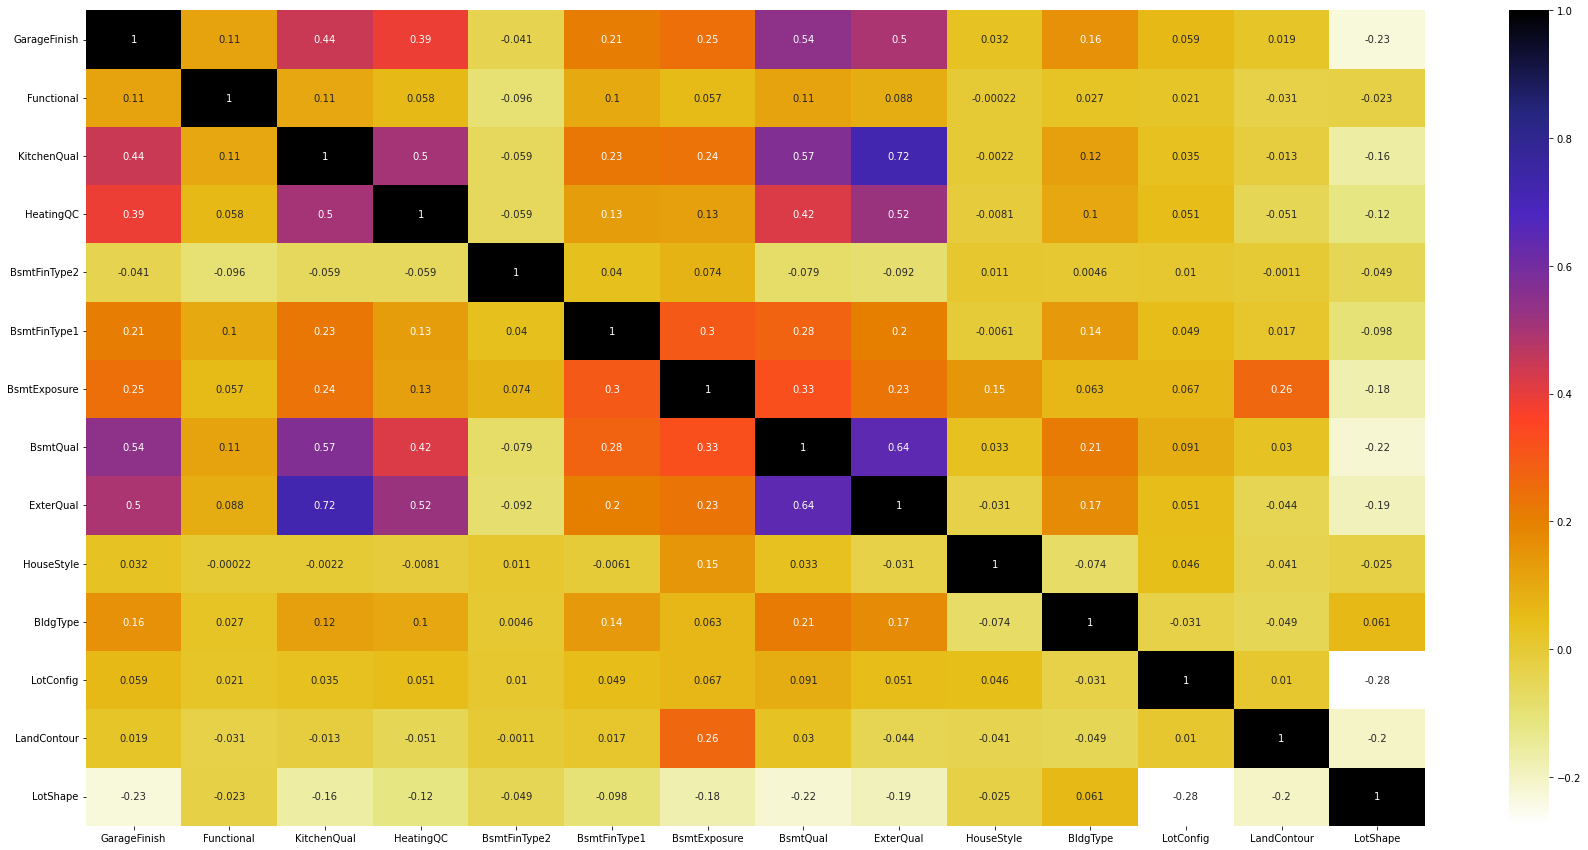

In [41]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(30,15))
cor = housing_cat_ordinal.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

### 1c. Information Gain

In [42]:
housing_cat = pd.concat([housing_cat_nominal, housing_cat_ordinal], axis=1)
housing_cat

,SaleCondition,SaleType,GarageType,Electrical,Foundation,MasVnrType,Exterior2nd,Exterior1st,RoofMatl,RoofStyle,...,BsmtFinType2,BsmtFinType1,BsmtExposure,BsmtQual,ExterQual,HouseStyle,BldgType,LotConfig,LandContour,LotShape
0,4.0,8.0,1.0,4.0,2.0,1.0,13.0,12.0,1.0,1.0,...,1.0,6.0,1.0,4.0,4,4,1.0,1,1,4
1,4.0,8.0,1.0,4.0,1.0,2.0,8.0,8.0,1.0,1.0,...,1.0,5.0,4.0,4.0,3,1,1.0,4,1,4
2,4.0,8.0,1.0,4.0,2.0,1.0,13.0,12.0,1.0,1.0,...,1.0,6.0,2.0,4.0,4,4,1.0,1,1,3
3,0.0,8.0,5.0,4.0,0.0,2.0,15.0,13.0,1.0,1.0,...,1.0,5.0,1.0,3.0,3,4,1.0,2,1,3
4,4.0,8.0,1.0,4.0,2.0,1.0,13.0,12.0,1.0,1.0,...,1.0,6.0,3.0,4.0,4,4,1.0,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.0,8.0,1.0,4.0,2.0,2.0,13.0,12.0,1.0,1.0,...,1.0,1.0,1.0,4.0,3,4,1.0,1,1,4
1456,4.0,8.0,1.0,4.0,1.0,3.0,10.0,9.0,1.0,1.0,...,3.0,5.0,1.0,4.0,3,1,1.0,1,1,4
1457,4.0,8.0,1.0,4.0,4.0,2.0,5.0,5.0,1.0,1.0,...,1.0,6.0,1.0,3.0,5,4,1.0,1,1,4
1458,4.0,8.0,1.0,0.0,1.0,2.0,8.0,8.0,1.0,3.0,...,3.0,6.0,2.0,3.0,3,1,1.0,1,1,4


In [43]:
housing_cat.isnull().sum()

SaleCondition      0
SaleType           0
GarageType        81
Electrical         1
Foundation         0
MasVnrType         8
Exterior2nd        0
Exterior1st        0
RoofMatl           0
RoofStyle          0
Condition1         0
Neighborhood       0
MSZoning           0
GarageFinish      81
Functional         0
KitchenQual        0
HeatingQC          0
BsmtFinType2      38
BsmtFinType1      37
BsmtExposure      38
BsmtQual          37
ExterQual          0
HouseStyle         0
BldgType         126
LotConfig          0
LandContour        0
LotShape           0
dtype: int64

In [44]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(housing_cat.fillna(0), housing_num_y)
mutual_info

array([0.08258158, 0.08457602, 0.2029202 , 0.0380451 , 0.19444329,
       0.10297738, 0.15978924, 0.13146011, 0.        , 0.01762115,
       0.02149342, 0.51218974, 0.13959855, 0.26458018, 0.        ,
       0.33749396, 0.15837201, 0.03769759, 0.14945415, 0.08050706,
       0.32729713, 0.32623393, 0.08465724, 0.02008128, 0.01581797,
       0.01740918, 0.08943751])

In [45]:
mutual_info=pd.Series(mutual_info)
mutual_info.index = housing_cat.columns
mutual_info.sort_values(ascending=False)

Neighborhood     0.512190
KitchenQual      0.337494
BsmtQual         0.327297
ExterQual        0.326234
GarageFinish     0.264580
GarageType       0.202920
Foundation       0.194443
Exterior2nd      0.159789
HeatingQC        0.158372
BsmtFinType1     0.149454
MSZoning         0.139599
Exterior1st      0.131460
MasVnrType       0.102977
LotShape         0.089438
HouseStyle       0.084657
SaleType         0.084576
SaleCondition    0.082582
BsmtExposure     0.080507
Electrical       0.038045
BsmtFinType2     0.037698
Condition1       0.021493
BldgType         0.020081
RoofStyle        0.017621
LandContour      0.017409
LotConfig        0.015818
Functional       0.000000
RoofMatl         0.000000
dtype: float64

<AxesSubplot:>

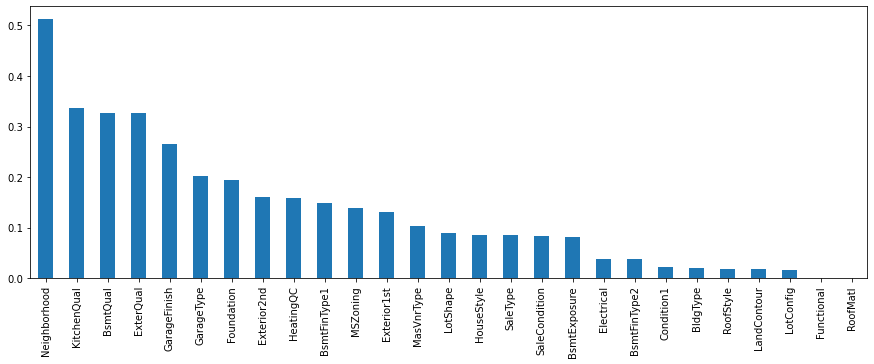

In [46]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [47]:
from sklearn.feature_selection import SelectPercentile
# Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=50)
selected_top_columns.fit(housing_cat.fillna(0), housing_num_y)
housing_cat = housing_cat.drop(housing_cat.columns[selected_top_columns.get_support()], axis=1)

In [48]:
housing_num_x.fillna(0, inplace=True)
housing_cat.fillna(0, inplace=True)

In [49]:
housing = pd.concat([housing_num_x, housing_cat], axis=1)

In [50]:
housing

,YrSold,MoSold,MiscVal,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch,WoodDeckSF,BedroomAbvGr,LowQualFinSF,...,RoofMatl,RoofStyle,Condition1,Functional,BsmtFinType2,BsmtExposure,HouseStyle,BldgType,LotConfig,LandContour
0,2008,2,0,0,0,0,0,0,3,0,...,1.0,1.0,2.0,7,1.0,1.0,4,1.0,1,1
1,2007,5,0,0,0,0,0,298,3,0,...,1.0,1.0,1.0,7,1.0,4.0,1,1.0,4,1
2,2008,9,0,0,0,0,0,0,3,0,...,1.0,1.0,2.0,7,1.0,2.0,4,1.0,1,1
3,2006,2,0,0,0,0,272,0,3,0,...,1.0,1.0,2.0,7,1.0,1.0,4,1.0,2,1
4,2008,12,0,0,0,0,0,192,4,0,...,1.0,1.0,2.0,7,1.0,3.0,4,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2007,8,0,0,0,0,0,0,3,0,...,1.0,1.0,2.0,7,1.0,1.0,4,1.0,1,1
1456,2010,2,0,0,0,0,0,349,3,0,...,1.0,1.0,2.0,6,3.0,1.0,1,1.0,1,1
1457,2010,5,2500,0,0,0,0,0,4,0,...,1.0,1.0,2.0,7,1.0,1.0,4,1.0,1,1
1458,2010,4,0,0,0,0,112,366,2,0,...,1.0,3.0,2.0,7,3.0,2.0,1,1.0,1,1


In [51]:
housing_cat.columns

Index(['SaleCondition', 'SaleType', 'Electrical', 'MasVnrType', 'RoofMatl',
       'RoofStyle', 'Condition1', 'Functional', 'BsmtFinType2', 'BsmtExposure',
       'HouseStyle', 'BldgType', 'LotConfig', 'LandContour'],
      dtype='object')

# Feature Scaling/Pipeline

In [52]:
# Dropping columns from housing_cat_nominal which are not present in the final housing_cat dataframe
housing_cat_nominal_drop_cols = [col for col in housing_cat_nominal.columns if col not in housing_cat.columns]
housing_cat_nominal = housing_cat_nominal.drop(housing_cat_nominal_drop_cols, axis=1)
housing_cat_nominal

,SaleCondition,SaleType,Electrical,MasVnrType,RoofMatl,RoofStyle,Condition1
0,4.0,8.0,4.0,1.0,1.0,1.0,2.0
1,4.0,8.0,4.0,2.0,1.0,1.0,1.0
2,4.0,8.0,4.0,1.0,1.0,1.0,2.0
3,0.0,8.0,4.0,2.0,1.0,1.0,2.0
4,4.0,8.0,4.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...
1455,4.0,8.0,4.0,2.0,1.0,1.0,2.0
1456,4.0,8.0,4.0,3.0,1.0,1.0,2.0
1457,4.0,8.0,4.0,2.0,1.0,1.0,2.0
1458,4.0,8.0,0.0,2.0,1.0,3.0,2.0


In [53]:
# Dropping columns from housing_cat_ordinal which are not present in the final housing_cat dataframe
housing_cat_ordinal_drop_cols = [col for col in housing_cat_ordinal.columns if col not in housing_cat.columns]
housing_cat_ordinal = housing_cat_ordinal.drop(housing_cat_ordinal_drop_cols, axis=1)
housing_cat_ordinal

,Functional,BsmtFinType2,BsmtExposure,HouseStyle,BldgType,LotConfig,LandContour
0,7,1.0,1.0,4,1.0,1,1
1,7,1.0,4.0,1,1.0,4,1
2,7,1.0,2.0,4,1.0,1,1
3,7,1.0,1.0,4,1.0,2,1
4,7,1.0,3.0,4,1.0,4,1
...,...,...,...,...,...,...,...
1455,7,1.0,1.0,4,1.0,1,1
1456,6,3.0,1.0,1,1.0,1,1
1457,7,1.0,1.0,4,1.0,1,1
1458,7,3.0,2.0,1,1.0,1,1


In [54]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_attribs = list(housing_num_x)
cat_nominal_attribs = list(housing_cat_nominal)
cat_ordinal_attribs = list(housing_cat_ordinal)

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")), ('std_scaler', StandardScaler())], verbose=True)
cat_nominal_pipeline = Pipeline([("cat_nominal_encoder", OrdinalEncoder())
                                 ,('cat_nominal_imputer', SimpleImputer(strategy="constant", fill_value=0))
                                ], verbose=True)
cat_ordinal_pipeline = Pipeline([("cat_ordinal_encoder", customOrdinalEncoding)
                                 ,('cat_ordinal_imputer', SimpleImputer(strategy="constant", fill_value=0))
                                ])

In [55]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),
                                   ("cat_nominal_pipeline", cat_nominal_pipeline, cat_nominal_attribs),
                                   ("cat_ordinal_pipeline", cat_ordinal_pipeline, cat_ordinal_attribs)                            
                                  ], verbose=True)
housing_prepared = full_pipeline.fit_transform(train_data)

[Pipeline] ........... (step 1 of 2) Processing imputer, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing std_scaler, total=   0.0s
[ColumnTransformer] ........... (1 of 3) Processing num, total=   0.0s
[Pipeline]  (step 1 of 2) Processing cat_nominal_encoder, total=   0.0s
[Pipeline]  (step 2 of 2) Processing cat_nominal_imputer, total=   0.0s
[ColumnTransformer]  (2 of 3) Processing cat_nominal_pipeline, total=   0.0s
Functional
0       7
1       7
2       7
3       7
4       7
       ..
1455    7
1456    6
1457    7
1458    7
1459    7
Name: Functional, Length: 1460, dtype: int64
BsmtFinType2
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1455    1.0
1456    3.0
1457    1.0
1458    3.0
1459    2.0
Name: BsmtFinType2, Length: 1460, dtype: float64
BsmtExposure
0       1.0
1       4.0
2       2.0
3       1.0
4       3.0
       ... 
1455    1.0
1456    1.0
1457    1.0
1458    2.0
1459    1.0
Name: BsmtExposure, Length: 1460, dtype: float64
HouseStyle
0

In [56]:
for array in housing_prepared:
    print(array)

[ 0.13877749 -1.5991111  -0.08768781 -0.06869175 -0.27020835 -0.11633929
 -0.3593249  -0.75217584  0.16377912 -0.12024172 -0.94459061 -0.28865283
  0.51410389 -0.51719981  4.          8.          4.          1.
  1.          1.          2.          7.          1.          1.
  4.          1.          1.          1.        ]
[-0.61443862 -0.48911005 -0.08768781 -0.06869175 -0.27020835 -0.11633929
 -0.3593249   1.62619479  0.16377912 -0.12024172 -0.64122799 -0.28865283
 -0.57075013  2.17962776  4.          8.          4.          2.
  1.          1.          1.          7.          1.          4.
  1.          1.          4.          1.        ]
[ 0.13877749  0.99089135 -0.08768781 -0.06869175 -0.27020835 -0.11633929
 -0.3593249  -0.75217584  0.16377912 -0.12024172 -0.30164298 -0.28865283
  0.32591493 -0.51719981  4.          8.          4.          1.
  1.          1.          2.          7.          1.          2.
  4.          1.          1.          1.        ]
[-1.36765473 -1.599111

# Select and Train a Model

# Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_num_y)

LinearRegression()

In [58]:
housing = train_data.copy()
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [59]:
some_data = housing.iloc[:5]
some_labels = housing_num_y.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", np.round_(lin_reg.predict(some_data_prepared)))

Functional
0    7
1    7
2    7
3    7
4    7
Name: Functional, dtype: int64
BsmtFinType2
0    1
1    1
2    1
3    1
4    1
Name: BsmtFinType2, dtype: int64
BsmtExposure
0    1
1    4
2    2
3    1
4    3
Name: BsmtExposure, dtype: int64
HouseStyle
0    4
1    1
2    4
3    4
4    4
Name: HouseStyle, dtype: int64
BldgType
0    1
1    1
2    1
3    1
4    1
Name: BldgType, dtype: int64
LotConfig
0    1
1    4
2    1
3    2
4    4
Name: LotConfig, dtype: int64
LandContour
0    1
1    1
2    1
3    1
4    1
Name: LandContour, dtype: int64
Predictions: [145815. 227963. 168599. 107084. 264914.]


In [60]:
print("Labels:", list(some_labels))

Labels: [208500, 181500, 223500, 140000, 250000]


In [61]:
x=zip(np.round_(lin_reg.predict(some_data_prepared)), list(some_labels))
print(list(x))

[(145815.0, 208500), (227963.0, 181500), (168599.0, 223500), (107084.0, 140000), (264914.0, 250000)]


# Calculating RMSE 

In [62]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_num_y, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

57051.51368008684

# Decision Tree Regressor

In [63]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_num_y)

DecisionTreeRegressor()

In [64]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_num_y, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

138.80758832046058

# Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_num_y)

RandomForestRegressor()

In [66]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_num_y, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

19584.873957969063

# Cross-Validation

## For Decision Tree Regressor

In [67]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_num_y, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [68]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [71396.48101378 63551.80493675 83637.13909973 73723.41982578
 81369.96370914 87765.9134349  63267.39534185 62273.38483528
 85621.05091507 64357.71807538]
Mean: 73696.42711876627
Standard Deviation: 9656.676145002972


## For Linear Regression

In [69]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_num_y, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [51809.48598049 59195.24262142 59471.46592739 65967.29778455
 64885.34308812 49095.47730213 53611.50642847 52146.967452
 75233.92946764 50009.29425228]
Mean: 58142.601030449805
Standard Deviation: 8039.065910722851


## For Random Forest Regressor

In [70]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_num_y, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49020.57528929 53014.37355938 50775.2736338  55647.4958361
 64640.43925051 47418.54779138 45211.65429622 46439.32646654
 68931.47156436 44752.36580606]
Mean: 52585.15234936457
Standard Deviation: 7862.964709450202


# Grid Search

In [78]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [60,70,90,110], 'max_features': [8,10,12,14]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared,housing_num_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [8, 10, 12, 14],
                          'n_estimators': [60, 70, 90, 110]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [79]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 70}

In [81]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

51202.432898580155 {'max_features': 8, 'n_estimators': 60}
51009.0139771642 {'max_features': 8, 'n_estimators': 70}
51097.292068678966 {'max_features': 8, 'n_estimators': 90}
51423.41190030867 {'max_features': 8, 'n_estimators': 110}
51601.42312054664 {'max_features': 10, 'n_estimators': 60}
51777.45655434084 {'max_features': 10, 'n_estimators': 70}
51091.52054872089 {'max_features': 10, 'n_estimators': 90}
51414.31451840688 {'max_features': 10, 'n_estimators': 110}
51737.45878130156 {'max_features': 12, 'n_estimators': 60}
51558.3989361729 {'max_features': 12, 'n_estimators': 70}
51560.928294440484 {'max_features': 12, 'n_estimators': 90}
51275.3148281148 {'max_features': 12, 'n_estimators': 110}
52122.36329363165 {'max_features': 14, 'n_estimators': 60}
52365.67869878985 {'max_features': 14, 'n_estimators': 70}
51804.90242350214 {'max_features': 14, 'n_estimators': 90}
51806.18746563566 {'max_features': 14, 'n_estimators': 110}
59668.10169097846 {'bootstrap': False, 'max_features': 2